Lab 4 - Feedforward Neural Network 

Q1

cpu
XORModal(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
  (activation2): ReLU()
)
EPOCH 0, LOSS 0.26193779706954956
EPOCH 1000, LOSS 0.25148744881153107
EPOCH 2000, LOSS 0.25117894634604454
EPOCH 3000, LOSS 0.25091884285211563
EPOCH 4000, LOSS 0.2506946362555027
EPOCH 5000, LOSS 0.2504964582622051
EPOCH 6000, LOSS 0.25031594187021255
EPOCH 7000, LOSS 0.25014735758304596
EPOCH 8000, LOSS 0.24998576939105988
EPOCH 9000, LOSS 0.24982453137636185


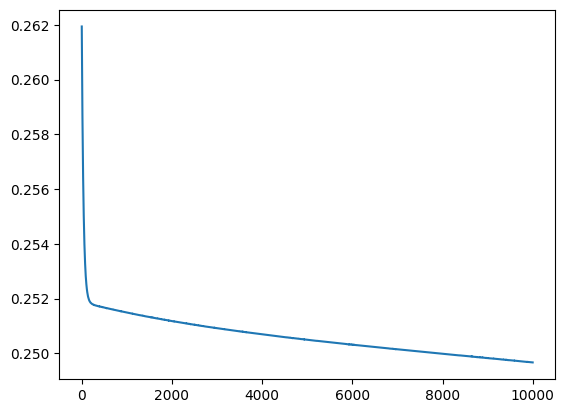

('w', Parameter containing:
tensor([0.8823], requires_grad=True))
('b', Parameter containing:
tensor([0.9150], requires_grad=True))
('linear1.weight', Parameter containing:
tensor([[-0.2775,  0.5190],
        [-0.2290,  0.3220]], requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.4296,  0.4300], requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[ 0.5316, -0.5814]], requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.6314], requires_grad=True))
The input is = {input}
Output y predicted = tensor([0.5140], grad_fn=<ReluBackward0>)


In [16]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,  DataLoader
import torch.nn as nn
import numpy as np


torch.manual_seed(42)

X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

class XORModal(nn.Module):
    def __init__(self):
        super(XORModal, self).__init__()
        self.w = torch.nn.Parameter(torch.rand([1]))
        self.b = torch.nn.Parameter(torch.rand([1]))
        self.linear1 = nn.Linear(2,2,bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)
        self.activation2 = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

full_dataset = MyDataset(X, Y)
batch_size = 1

train_data_loader = DataLoader(full_dataset,batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = XORModal().to(device)
print(model)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

def train_one_epoch(epoch_index):
    total_loss = 0

    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step() 
        total_loss += loss.item()

    return total_loss/(len(train_data_loader) * batch_size)


loss_list = []
EPOCHS = 10000

for epoch in range(EPOCHS):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)

    if epoch % 1000 == 0:
        print(f"EPOCH {epoch}, LOSS {avg_loss}")

plt.plot(loss_list)
plt.show()

for param in model.named_parameters():
    print(param)

input = torch.tensor([0,1], dtype=torch.float32).to(device)
model.eval()
print("The input is = {input}")
print("Output y predicted = {}".format(model(input)))

Q2

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 0/10000, Loss: 0.28828215412795544
Epoch 1000/10000, Loss: 0.13222978546400554
Epoch 2000/10000, Loss: 0.13277034627981266
Epoch 3000/10000, Loss: 0.13273568680347125
Epoch 4000/10000, Loss: 0.13273096554848962
Epoch 5000/10000, Loss: 0.1327835510719524
Epoch 6000/10000, Loss: 0.1328371121908276
Epoch 7000/10000, Loss: 0.13272638581878482
Epoch 8000/10000, Loss: 0.13273535281267357
Epoch 9000/10000, Loss: 0.1324844262948659

Learnable Parameters:
('linear1.weight', Parameter containing:
tensor([[ 0.6139,  0.6554],
        [-0.6774,  0.6844]], requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.6271, -0.0178], requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.7764,  0.7782]], requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.4958], requires_grad=True))
Total num

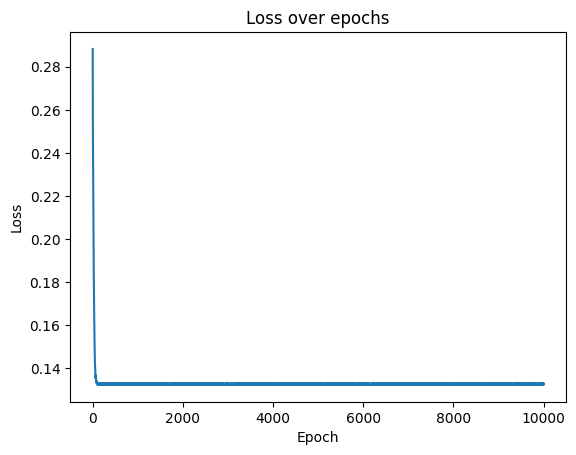

In [18]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

loss_list = []
torch.manual_seed(42)
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.ReLU()  # Changed to ReLU
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)  # Applying ReLU activation
        x = self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

full_dataset = MyDataset(X, Y)
batch_size = 1

train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

EPOCHS = 10000

def train_one_epoch(epoch_index):
    totalloss = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = loss_fn(outputs.flatten(), labels.to(device))
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss / (len(train_data_loader) * batch_size)

for epoch in range(EPOCHS):
    model.train()
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

print("\nLearnable Parameters:")
for param in model.named_parameters():
    print(param)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of learnable parameters: {total_params}")

input_data = torch.tensor([0, 1], dtype=torch.float32).to(device)
model.eval()
print("The input = {}".format(input_data))
print("Output y predicted = {}".format(model(input_data)))

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.show()

Q3

In [19]:
import torch
import torch.nn as nn

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2)  
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1)  
        self.activation2 = nn.Sigmoid()

    def forward(self, x):
        x = self.activation1(self.linear1(x))
        x = self.activation2(self.linear2(x))
        return x

model = XORModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()

weights1 = model.linear1.weight.data
biases1 = model.linear1.bias.data
weights2 = model.linear2.weight.data
biases2 = model.linear2.bias.data

def manual_forward(X):
    layer1_output = torch.sigmoid(torch.matmul(X, weights1.T) + biases1)
    output = torch.sigmoid(torch.matmul(layer1_output, weights2.T) + biases2)
    return output

manual_output = manual_forward(X)
model_output = model(X)

print("Manual Output:")
print(manual_output)
print("\nModel Output:")
print(model_output)

if torch.allclose(manual_output, model_output, atol=1e-6):
    print("\nThe manual computation matches the model output!")
else:
    print("\nThe manual computation does NOT match the model output.")

Manual Output:
tensor([[0.4991],
        [0.4951],
        [0.5059],
        [0.4992]])

Model Output:
tensor([[0.4991],
        [0.4951],
        [0.5059],
        [0.4992]], grad_fn=<SigmoidBackward0>)

The manual computation matches the model output!


Q4

Epoch 1/5, Loss: 0.08632880449295044
Epoch 2/5, Loss: 0.2090381532907486
Epoch 3/5, Loss: 0.1984071135520935
Epoch 4/5, Loss: 0.026926174759864807
Epoch 5/5, Loss: 0.09182385355234146
Accuracy: 96.77%


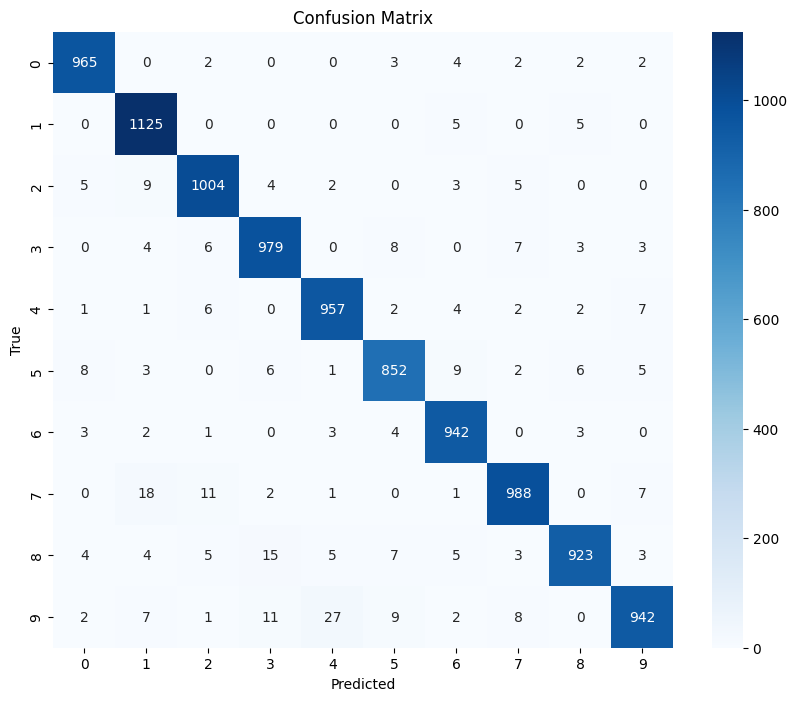

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import seaborn as sns

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()